In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import numpy as np
import seaborn as sns
import os
from tqdm import notebook

In [76]:
## 한글 폰트 적용 ( 안하면 한글 깨짐 )
f_name = fm.FontProperties(fname="C:/Windows/Fonts/malgunbd.ttf").get_name()
plt.rc('font', family=f_name)

%matplotlib inline

train = pd.read_csv('C:/Users/user/LikeLion_AI/DACON/Parking_demand/parking_data_preprocessing_train_07_20.csv')
test = pd.read_csv('C:/Users/user/LikeLion_AI/DACON/Parking_demand/parking_data_preprocessing_test_07_20.csv')
sub = pd.read_csv('C:/Users/user/LikeLion_AI/DACON/Parking_demand/CSV/sample_submission.csv')
age = pd.read_csv('C:/Users/user/LikeLion_AI/DACON/Parking_demand/CSV/age_gender_info.csv')

train.shape, test.shape, sub.shape, age.shape

((2869, 17), (1022, 16), (150, 2), (16, 23))

In [77]:
train.loc[train['전용면적별세대수']<=10, '전용면적별세대수(소)'] = 1
train.loc[(train['전용면적별세대수']>10)&(train['전용면적별세대수']<=200), '전용면적별세대수(소)'] = 0
train.loc[train['전용면적별세대수']>200, '전용면적별세대수(소)'] = 0

train.loc[train['전용면적별세대수']<=10, '전용면적별세대수(중)'] = 0
train.loc[(train['전용면적별세대수']>10)&(train['전용면적별세대수']<=200), '전용면적별세대수(중)'] = 1
train.loc[train['전용면적별세대수']>200, '전용면적별세대수(중)'] = 0

train.loc[train['전용면적별세대수']<=10, '전용면적별세대수(대)'] = 0
train.loc[(train['전용면적별세대수']>10)&(train['전용면적별세대수']<=200), '전용면적별세대수(대)'] = 0
train.loc[train['전용면적별세대수']>200, '전용면적별세대수(대)'] = 1

train['전용면적별세대수(소)'] = train['전용면적별세대수(소)'].astype('int')
train['전용면적별세대수(중)'] = train['전용면적별세대수(중)'].astype('int')
train['전용면적별세대수(대)'] = train['전용면적별세대수(대)'].astype('int')

In [78]:
test.loc[test['전용면적별세대수']<=10, '전용면적별세대수(소)'] = 1
test.loc[(test['전용면적별세대수']>10)&(test['전용면적별세대수']<=200), '전용면적별세대수(소)'] = 0
test.loc[test['전용면적별세대수']>200, '전용면적별세대수(소)'] = 0

test.loc[test['전용면적별세대수']<=10, '전용면적별세대수(중)'] = 0
test.loc[(test['전용면적별세대수']>10)&(test['전용면적별세대수']<=200), '전용면적별세대수(중)'] = 1
test.loc[test['전용면적별세대수']>200, '전용면적별세대수(중)'] = 0

test.loc[test['전용면적별세대수']<=10, '전용면적별세대수(대)'] = 0
test.loc[(test['전용면적별세대수']>10)&(test['전용면적별세대수']<=200), '전용면적별세대수(대)'] = 0
test.loc[test['전용면적별세대수']>200, '전용면적별세대수(대)'] = 1

test['전용면적별세대수(소)'] = test['전용면적별세대수(소)'].astype('int')
test['전용면적별세대수(중)'] = test['전용면적별세대수(중)'].astype('int')
test['전용면적별세대수(대)'] = test['전용면적별세대수(대)'].astype('int')

In [79]:
train.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '지하철', '버스정류장', '단지내주차면수', '등록차량수', '건물_아파트',
       '건물_상가', '전용면적별세대수(소)', '전용면적별세대수(중)', '전용면적별세대수(대)'],
      dtype='object')

In [80]:
log_list = ['총세대수', '전용면적', '전용면적별세대수', 
            '임대보증금', '임대료', '단지내주차면수']

for feature in log_list:
    train[feature] = np.log(train[feature]+1)
    test[feature] = np.log(test[feature]+1)

In [87]:
test[test['버스정류장']>20]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스정류장,단지내주차면수,건물_아파트,건물_상가,전용면적별세대수(소),전용면적별세대수(중),전용면적별세대수(대)
383,C1852,6.801283,1,1,5,3.703522,5.393628,6.0,7,16.981829,12.192131,0.0,50.0,6.666957,1.0,0.0,0,0,1
384,C1852,6.801283,1,1,5,3.706719,4.043051,6.0,0,16.981829,12.192131,0.0,50.0,6.666957,1.0,0.0,0,1,0
385,C1852,6.801283,1,1,5,3.706719,3.806662,6.0,0,16.981829,12.192131,0.0,50.0,6.666957,1.0,0.0,0,1,0
386,C1852,6.801283,1,1,5,3.869116,3.850148,6.0,0,17.438624,12.467132,0.0,50.0,6.666957,1.0,0.0,0,1,0
387,C1852,6.801283,1,1,5,3.869116,3.135494,6.0,0,17.438624,12.467132,0.0,50.0,6.666957,1.0,0.0,0,1,0
388,C1852,6.801283,1,1,5,3.869116,5.420535,6.0,7,17.438624,12.467132,0.0,50.0,6.666957,1.0,0.0,0,0,1
389,C1852,6.801283,1,1,5,3.968970,4.919981,6.0,7,17.626453,12.638994,0.0,50.0,6.666957,1.0,0.0,0,1,0
390,C1852,6.801283,1,1,5,3.968970,3.806662,6.0,7,17.626453,12.638994,0.0,50.0,6.666957,1.0,0.0,0,1,0
391,C1852,6.801283,1,1,5,4.104460,4.672829,6.0,7,17.937373,12.823394,0.0,50.0,6.666957,1.0,0.0,0,1,0


In [88]:
%%time
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

sel = ['총세대수', '지역', '공급유형', '전용면적', 
       '전용면적별세대수', '공가수', '자격유형', '임대보증금', '임대료', 
       '단지내주차면수', '건물_아파트', '건물_상가', 
       '전용면적별세대수(소)', '전용면적별세대수(중)', '전용면적별세대수(대)']

X = train[sel]
y = train['등록차량수']
test_X = test[sel]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, random_state=345)

kfold = RepeatedKFold(n_splits=5, n_repeats=1, random_state=234)

for esti in notebook.tqdm(range(1500, 3001, 100)):
    Random_F = RandomForestRegressor(n_estimators=esti, random_state=123)
    
    train_score = cross_val_score(Random_F, X_train, y_train, 
                            cv=kfold, scoring='neg_mean_absolute_error')
    test_score = cross_val_score(Random_F, X_test, y_test, 
                            cv=kfold, scoring='neg_mean_absolute_error')
    
    print(f'estimators : {esti}')
    print(f'train score : {round(train_score.mean(), 4)}')
    print(f'test score : {round(test_score.mean(), 4)}')
    print('---------------------------------------')

estimators : 1500
train score : -31.429
test score : -76.2213
---------------------------------------
estimators : 1600
train score : -31.4111
test score : -76.2725
---------------------------------------
estimators : 1700
train score : -31.3968
test score : -76.2558
---------------------------------------
estimators : 1800
train score : -31.3992
test score : -76.204
---------------------------------------
estimators : 1900
train score : -31.4001
test score : -76.2083
---------------------------------------
estimators : 2000
train score : -31.3851
test score : -76.2718
---------------------------------------
estimators : 2100
train score : -31.3749
test score : -76.2463
---------------------------------------
estimators : 2200
train score : -31.3644
test score : -76.2896
---------------------------------------
estimators : 2300
train score : -31.3504
test score : -76.2448
---------------------------------------
estimators : 2400
train score : -31.3202
test score : -76.243
-------------

In [39]:
def plot_feature_important_up(model, n_features, feature_names):
    imp = model.feature_importances_     # feature의 중요도
    
    plt.figure(figsize=(10,6), facecolor='white')
    plt.barh(range(n_features) , imp, align='center')  # 그래프(가로 막대 그래프)
    
    plt.yticks(np.arange(n_features), feature_names)  #y축의 축의 값
    plt.xlabel("feature importance")   # x축 레이블(제목)
    plt.ylabel("feature")              # y축 제목
    plt.ylim(-1, n_features)           # y축의 범위 지정
    
    plt.show()

In [89]:
Random_F = RandomForestRegressor(n_estimators=2600, random_state=123)
Random_F.fit(X, y)
pred1 = Random_F.predict(test_X)
pred1

array([658.33076923, 672.10307692, 662.25538462, ..., 226.63346154,
       232.87423077, 238.64423077])

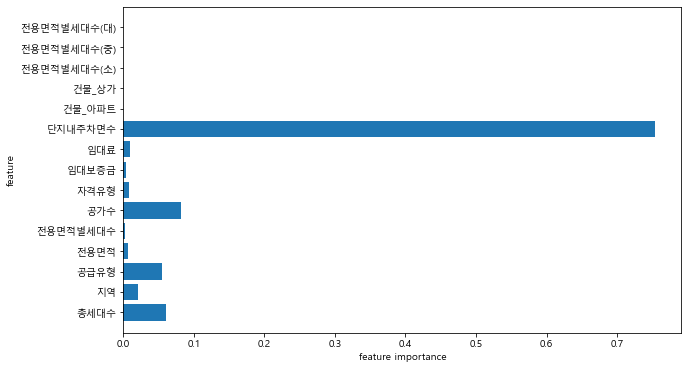

In [90]:
feature_names = sel

n_features = X.shape[1]
plot_feature_important_up(Random_F, n_features, feature_names)

In [38]:
print(sel)
print(Random_F.feature_importances_)

['총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수', '자격유형', '임대보증금', '임대료', '지하철', '버스정류장', '단지내주차면수', '건물_아파트', '건물_상가', '전용면적별세대수(소)', '전용면적별세대수(중)', '전용면적별세대수(대)']
[5.62609967e-02 1.41918579e-05 1.85789843e-02 5.40311311e-02
 5.33481173e-03 2.03341590e-03 7.75563280e-02 7.84100272e-03
 3.28583876e-03 7.55354841e-03 2.85419372e-03 1.56825057e-02
 7.48827546e-01 1.08623035e-05 8.81949648e-06 3.16110146e-05
 4.82245361e-05 4.59878654e-05]


In [30]:
%%time
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, random_state=345)

kfold = RepeatedKFold(n_splits=5, n_repeats=1, random_state=234)

for esti in notebook.tqdm(range(200, 3001, 100)):
    print('\n\n')
    for rate in notebook.tqdm(range(7, 22, 2)):
        Gradient_B = GradientBoostingRegressor(learning_rate=rate/100, max_depth=3,
                                               n_estimators=esti, random_state=123)
        
        train_score = cross_val_score(Gradient_B, X_train, y_train, 
                            cv=kfold, scoring='neg_mean_absolute_error')
        test_score = cross_val_score(Gradient_B, X_test, y_test, 
                                cv=kfold, scoring='neg_mean_absolute_error')

        print(f'estimators : {esti} , learning rate : {rate/100}')
        print(f'train score : {round(train_score.mean(), 4)}')
        print(f'test score : {round(test_score.mean(), 4)}')
        print('--------------------------------------------')

estimators : 200 , learning rate : 0.07
train score : -64.7295
test score : -82.7563
--------------------------------------------
estimators : 200 , learning rate : 0.09
train score : -60.3996
test score : -79.8512
--------------------------------------------
estimators : 200 , learning rate : 0.11
train score : -55.5161
test score : -76.4495
--------------------------------------------
estimators : 200 , learning rate : 0.13
train score : -51.7387
test score : -76.2234
--------------------------------------------
estimators : 200 , learning rate : 0.15
train score : -49.3452
test score : -74.9727
--------------------------------------------
estimators : 200 , learning rate : 0.17
train score : -46.4015
test score : -73.4468
--------------------------------------------
estimators : 200 , learning rate : 0.19
train score : -44.3922
test score : -71.8634
--------------------------------------------
estimators : 200 , learning rate : 0.21
train score : -42.0555
test score : -72.0251
-----

estimators : 300 , learning rate : 0.07
train score : -56.8017
test score : -78.3016
--------------------------------------------
estimators : 300 , learning rate : 0.09
train score : -52.1585
test score : -74.8476
--------------------------------------------
estimators : 300 , learning rate : 0.11
train score : -46.5654
test score : -72.4808
--------------------------------------------
estimators : 300 , learning rate : 0.13
train score : -44.4382
test score : -72.2227
--------------------------------------------
estimators : 300 , learning rate : 0.15
train score : -41.6478
test score : -71.4068
--------------------------------------------
estimators : 300 , learning rate : 0.17
train score : -38.9119
test score : -70.5925
--------------------------------------------
estimators : 300 , learning rate : 0.19
train score : -37.6812
test score : -69.0126
--------------------------------------------
estimators : 300 , learning rate : 0.21
train score : -35.2228
test score : -69.8011
-----

estimators : 400 , learning rate : 0.07
train score : -51.029
test score : -75.0164
--------------------------------------------
estimators : 400 , learning rate : 0.09
train score : -46.3587
test score : -72.4275
--------------------------------------------
estimators : 400 , learning rate : 0.11
train score : -41.581
test score : -69.9911
--------------------------------------------
estimators : 400 , learning rate : 0.13
train score : -39.317
test score : -70.0573
--------------------------------------------
estimators : 400 , learning rate : 0.15
train score : -36.7935
test score : -70.2037
--------------------------------------------
estimators : 400 , learning rate : 0.17
train score : -34.9778
test score : -69.2695
--------------------------------------------
estimators : 400 , learning rate : 0.19
train score : -33.8529
test score : -67.8468
--------------------------------------------
estimators : 400 , learning rate : 0.21
train score : -31.9176
test score : -68.7979
--------

estimators : 500 , learning rate : 0.07
train score : -46.7063
test score : -73.3078
--------------------------------------------
estimators : 500 , learning rate : 0.09
train score : -42.0908
test score : -70.6123
--------------------------------------------
estimators : 500 , learning rate : 0.11
train score : -37.6224
test score : -68.4976
--------------------------------------------
estimators : 500 , learning rate : 0.13
train score : -35.8836
test score : -69.0765
--------------------------------------------
estimators : 500 , learning rate : 0.15
train score : -33.5722
test score : -69.3521
--------------------------------------------
estimators : 500 , learning rate : 0.17
train score : -32.1227
test score : -68.4974
--------------------------------------------
estimators : 500 , learning rate : 0.19
train score : -31.5476
test score : -67.1631
--------------------------------------------
estimators : 500 , learning rate : 0.21
train score : -29.6294
test score : -68.2793
-----

estimators : 600 , learning rate : 0.07
train score : -43.2788
test score : -71.6847
--------------------------------------------
estimators : 600 , learning rate : 0.09
train score : -38.6541
test score : -69.0922
--------------------------------------------
estimators : 600 , learning rate : 0.11
train score : -34.6789
test score : -67.5982
--------------------------------------------
estimators : 600 , learning rate : 0.13
train score : -33.3013
test score : -68.3542
--------------------------------------------
estimators : 600 , learning rate : 0.15
train score : -31.5943
test score : -68.8971
--------------------------------------------
estimators : 600 , learning rate : 0.17
train score : -30.2031
test score : -68.029
--------------------------------------------
estimators : 600 , learning rate : 0.19
train score : -29.9181
test score : -66.7013
--------------------------------------------
estimators : 600 , learning rate : 0.21
train score : -28.187
test score : -68.039
--------

estimators : 700 , learning rate : 0.07
train score : -40.7503
test score : -70.6286
--------------------------------------------
estimators : 700 , learning rate : 0.09
train score : -36.183
test score : -68.3429
--------------------------------------------
estimators : 700 , learning rate : 0.11
train score : -32.7474
test score : -66.9683
--------------------------------------------
estimators : 700 , learning rate : 0.13
train score : -31.418
test score : -67.886
--------------------------------------------
estimators : 700 , learning rate : 0.15
train score : -30.0527
test score : -68.6311
--------------------------------------------
estimators : 700 , learning rate : 0.17
train score : -28.8932
test score : -67.7014
--------------------------------------------
estimators : 700 , learning rate : 0.19
train score : -28.8199
test score : -66.4525
--------------------------------------------
estimators : 700 , learning rate : 0.21
train score : -27.1964
test score : -67.8799
--------

estimators : 800 , learning rate : 0.07
train score : -38.3449
test score : -69.6345
--------------------------------------------
estimators : 800 , learning rate : 0.09
train score : -34.3055
test score : -67.619
--------------------------------------------
estimators : 800 , learning rate : 0.11
train score : -31.0306
test score : -66.5473
--------------------------------------------
estimators : 800 , learning rate : 0.13
train score : -30.0423
test score : -67.553
--------------------------------------------
estimators : 800 , learning rate : 0.15
train score : -28.8226
test score : -68.4103
--------------------------------------------
estimators : 800 , learning rate : 0.17
train score : -27.9494
test score : -67.4802
--------------------------------------------
estimators : 800 , learning rate : 0.19
train score : -28.0971
test score : -66.3408
--------------------------------------------
estimators : 800 , learning rate : 0.21
train score : -26.4549
test score : -67.793
--------

estimators : 900 , learning rate : 0.07
train score : -36.4515
test score : -69.0552
--------------------------------------------
estimators : 900 , learning rate : 0.09
train score : -32.6894
test score : -67.2407
--------------------------------------------
estimators : 900 , learning rate : 0.11
train score : -29.9179
test score : -66.2276
--------------------------------------------
estimators : 900 , learning rate : 0.13
train score : -28.9516
test score : -67.3188
--------------------------------------------
estimators : 900 , learning rate : 0.15
train score : -27.8811
test score : -68.3104
--------------------------------------------
estimators : 900 , learning rate : 0.17
train score : -27.1663
test score : -67.372
--------------------------------------------
estimators : 900 , learning rate : 0.19
train score : -27.4706
test score : -66.2636
--------------------------------------------
estimators : 900 , learning rate : 0.21
train score : -25.9323
test score : -67.7304
------

estimators : 1000 , learning rate : 0.07
train score : -34.9358
test score : -68.5966
--------------------------------------------
estimators : 1000 , learning rate : 0.09
train score : -31.5331
test score : -66.9015
--------------------------------------------
estimators : 1000 , learning rate : 0.11
train score : -28.9829
test score : -65.9972
--------------------------------------------
estimators : 1000 , learning rate : 0.13
train score : -28.0268
test score : -67.1527
--------------------------------------------
estimators : 1000 , learning rate : 0.15
train score : -27.1118
test score : -68.208
--------------------------------------------
estimators : 1000 , learning rate : 0.17
train score : -26.5682
test score : -67.3009
--------------------------------------------
estimators : 1000 , learning rate : 0.19
train score : -27.0206
test score : -66.2279
--------------------------------------------
estimators : 1000 , learning rate : 0.21
train score : -25.4985
test score : -67.705

estimators : 1100 , learning rate : 0.07
train score : -33.7539
test score : -68.316
--------------------------------------------
estimators : 1100 , learning rate : 0.09
train score : -30.5566
test score : -66.6467
--------------------------------------------
estimators : 1100 , learning rate : 0.11
train score : -28.2349
test score : -65.888
--------------------------------------------
estimators : 1100 , learning rate : 0.13
train score : -27.3992
test score : -67.0596
--------------------------------------------
estimators : 1100 , learning rate : 0.15
train score : -26.5214
test score : -68.1706
--------------------------------------------
estimators : 1100 , learning rate : 0.17
train score : -26.1024
test score : -67.2653
--------------------------------------------
estimators : 1100 , learning rate : 0.19
train score : -26.5611
test score : -66.1921
--------------------------------------------
estimators : 1100 , learning rate : 0.21
train score : -25.2384
test score : -67.6753

estimators : 1200 , learning rate : 0.07
train score : -32.7231
test score : -68.1677
--------------------------------------------
estimators : 1200 , learning rate : 0.09
train score : -29.7484
test score : -66.521
--------------------------------------------
estimators : 1200 , learning rate : 0.11
train score : -27.5254
test score : -65.7561
--------------------------------------------
estimators : 1200 , learning rate : 0.13
train score : -26.8693
test score : -66.9918
--------------------------------------------
estimators : 1200 , learning rate : 0.15
train score : -26.1411
test score : -68.1259
--------------------------------------------
estimators : 1200 , learning rate : 0.17
train score : -25.7413
test score : -67.2347
--------------------------------------------
estimators : 1200 , learning rate : 0.19
train score : -26.2971
test score : -66.1655
--------------------------------------------
estimators : 1200 , learning rate : 0.21
train score : -25.007
test score : -67.662


estimators : 1300 , learning rate : 0.07
train score : -31.7908
test score : -68.0158
--------------------------------------------
estimators : 1300 , learning rate : 0.09
train score : -29.0918
test score : -66.4533
--------------------------------------------
estimators : 1300 , learning rate : 0.11
train score : -26.9737
test score : -65.6784
--------------------------------------------
estimators : 1300 , learning rate : 0.13
train score : -26.4564
test score : -66.9588
--------------------------------------------
estimators : 1300 , learning rate : 0.15
train score : -25.8047
test score : -68.0876
--------------------------------------------
estimators : 1300 , learning rate : 0.17
train score : -25.4806
test score : -67.2212
--------------------------------------------
estimators : 1300 , learning rate : 0.19
train score : -26.086
test score : -66.1485
--------------------------------------------
estimators : 1300 , learning rate : 0.21
train score : -24.8557
test score : -67.652

estimators : 1400 , learning rate : 0.07
train score : -30.9321
test score : -67.8859
--------------------------------------------
estimators : 1400 , learning rate : 0.09
train score : -28.4892
test score : -66.3573
--------------------------------------------
estimators : 1400 , learning rate : 0.11
train score : -26.5266
test score : -65.6038
--------------------------------------------
estimators : 1400 , learning rate : 0.13
train score : -26.177
test score : -66.9131
--------------------------------------------
estimators : 1400 , learning rate : 0.15
train score : -25.5291
test score : -68.0564
--------------------------------------------
estimators : 1400 , learning rate : 0.17
train score : -25.2684
test score : -67.2084
--------------------------------------------
estimators : 1400 , learning rate : 0.19
train score : -25.9075
test score : -66.1407
--------------------------------------------
estimators : 1400 , learning rate : 0.21
train score : -24.7288
test score : -67.644

estimators : 1500 , learning rate : 0.07
train score : -30.2033
test score : -67.7996
--------------------------------------------
estimators : 1500 , learning rate : 0.09
train score : -27.9368
test score : -66.3014
--------------------------------------------
estimators : 1500 , learning rate : 0.11
train score : -26.1321
test score : -65.5434
--------------------------------------------
estimators : 1500 , learning rate : 0.13
train score : -25.9032
test score : -66.8801
--------------------------------------------
estimators : 1500 , learning rate : 0.15
train score : -25.291
test score : -68.0228
--------------------------------------------
estimators : 1500 , learning rate : 0.17
train score : -25.103
test score : -67.1936
--------------------------------------------
estimators : 1500 , learning rate : 0.19
train score : -25.7407
test score : -66.1348
--------------------------------------------
estimators : 1500 , learning rate : 0.21
train score : -24.6134
test score : -67.6399

estimators : 1600 , learning rate : 0.07
train score : -29.595
test score : -67.6469
--------------------------------------------
estimators : 1600 , learning rate : 0.09
train score : -27.4893
test score : -66.2679
--------------------------------------------
estimators : 1600 , learning rate : 0.11
train score : -25.8379
test score : -65.5038
--------------------------------------------
estimators : 1600 , learning rate : 0.13
train score : -25.6174
test score : -66.8597
--------------------------------------------
estimators : 1600 , learning rate : 0.15
train score : -25.1062
test score : -68.0017
--------------------------------------------
estimators : 1600 , learning rate : 0.17
train score : -24.9542
test score : -67.1901
--------------------------------------------
estimators : 1600 , learning rate : 0.19
train score : -25.6164
test score : -66.1279
--------------------------------------------
estimators : 1600 , learning rate : 0.21
train score : -24.5126
test score : -67.637

estimators : 1700 , learning rate : 0.07
train score : -29.0633
test score : -67.5196
--------------------------------------------
estimators : 1700 , learning rate : 0.09
train score : -27.0848
test score : -66.2396
--------------------------------------------
estimators : 1700 , learning rate : 0.11
train score : -25.5839
test score : -65.47
--------------------------------------------
estimators : 1700 , learning rate : 0.13
train score : -25.4215
test score : -66.856
--------------------------------------------
estimators : 1700 , learning rate : 0.15
train score : -24.9485
test score : -67.9942
--------------------------------------------
estimators : 1700 , learning rate : 0.17
train score : -24.8417
test score : -67.1777
--------------------------------------------
estimators : 1700 , learning rate : 0.19
train score : -25.5093
test score : -66.1227
--------------------------------------------
estimators : 1700 , learning rate : 0.21
train score : -24.4343
test score : -67.6353


estimators : 1800 , learning rate : 0.07
train score : -28.532
test score : -67.4214
--------------------------------------------
estimators : 1800 , learning rate : 0.09
train score : -26.7571
test score : -66.204
--------------------------------------------
estimators : 1800 , learning rate : 0.11
train score : -25.3496
test score : -65.4383
--------------------------------------------
estimators : 1800 , learning rate : 0.13
train score : -25.2529
test score : -66.8391
--------------------------------------------
estimators : 1800 , learning rate : 0.15
train score : -24.7995
test score : -67.9871
--------------------------------------------
estimators : 1800 , learning rate : 0.17
train score : -24.7454
test score : -67.1732
--------------------------------------------
estimators : 1800 , learning rate : 0.19
train score : -25.4328
test score : -66.118
--------------------------------------------
estimators : 1800 , learning rate : 0.21
train score : -24.3858
test score : -67.6337


estimators : 1900 , learning rate : 0.07
train score : -28.1247
test score : -67.3627
--------------------------------------------
estimators : 1900 , learning rate : 0.09
train score : -26.4747
test score : -66.1723
--------------------------------------------
estimators : 1900 , learning rate : 0.11
train score : -25.1262
test score : -65.4164
--------------------------------------------
estimators : 1900 , learning rate : 0.13
train score : -25.0865
test score : -66.8292
--------------------------------------------
estimators : 1900 , learning rate : 0.15
train score : -24.6952
test score : -67.9777
--------------------------------------------
estimators : 1900 , learning rate : 0.17
train score : -24.6542
test score : -67.1673
--------------------------------------------
estimators : 1900 , learning rate : 0.19
train score : -25.3782
test score : -66.1158
--------------------------------------------
estimators : 1900 , learning rate : 0.21
train score : -24.3358
test score : -67.63

estimators : 2000 , learning rate : 0.07
train score : -27.7403
test score : -67.2818
--------------------------------------------
estimators : 2000 , learning rate : 0.09
train score : -26.2354
test score : -66.1542
--------------------------------------------
estimators : 2000 , learning rate : 0.11
train score : -24.9331
test score : -65.399
--------------------------------------------
estimators : 2000 , learning rate : 0.13
train score : -24.9654
test score : -66.8242
--------------------------------------------
estimators : 2000 , learning rate : 0.15
train score : -24.6093
test score : -67.9709
--------------------------------------------
estimators : 2000 , learning rate : 0.17
train score : -24.5862
test score : -67.1645
--------------------------------------------
estimators : 2000 , learning rate : 0.19
train score : -25.3186
test score : -66.1131
--------------------------------------------
estimators : 2000 , learning rate : 0.21
train score : -24.285
test score : -67.6328

estimators : 2100 , learning rate : 0.07
train score : -27.3947
test score : -67.2562
--------------------------------------------
estimators : 2100 , learning rate : 0.09
train score : -26.0239
test score : -66.1429
--------------------------------------------
estimators : 2100 , learning rate : 0.11
train score : -24.769
test score : -65.389
--------------------------------------------
estimators : 2100 , learning rate : 0.13
train score : -24.8458
test score : -66.8184
--------------------------------------------
estimators : 2100 , learning rate : 0.15
train score : -24.5276
test score : -67.9676
--------------------------------------------
estimators : 2100 , learning rate : 0.17
train score : -24.5099
test score : -67.1622
--------------------------------------------
estimators : 2100 , learning rate : 0.19
train score : -25.2878
test score : -66.1115
--------------------------------------------
estimators : 2100 , learning rate : 0.21
train score : -24.2397
test score : -67.6325

estimators : 2200 , learning rate : 0.07
train score : -27.087
test score : -67.2266
--------------------------------------------
estimators : 2200 , learning rate : 0.09
train score : -25.8273
test score : -66.1261
--------------------------------------------
estimators : 2200 , learning rate : 0.11
train score : -24.6518
test score : -65.3754
--------------------------------------------
estimators : 2200 , learning rate : 0.13
train score : -24.7514
test score : -66.815
--------------------------------------------
estimators : 2200 , learning rate : 0.15
train score : -24.4707
test score : -67.9634
--------------------------------------------
estimators : 2200 , learning rate : 0.17
train score : -24.4617
test score : -67.1605
--------------------------------------------
estimators : 2200 , learning rate : 0.19
train score : -25.2445
test score : -66.1112
--------------------------------------------
estimators : 2200 , learning rate : 0.21
train score : -24.2021
test score : -67.632


estimators : 2300 , learning rate : 0.07
train score : -26.8467
test score : -67.2042
--------------------------------------------
estimators : 2300 , learning rate : 0.09
train score : -25.6708
test score : -66.1112
--------------------------------------------
estimators : 2300 , learning rate : 0.11
train score : -24.5455
test score : -65.3653
--------------------------------------------
estimators : 2300 , learning rate : 0.13
train score : -24.6635
test score : -66.8102
--------------------------------------------
estimators : 2300 , learning rate : 0.15
train score : -24.4175
test score : -67.9589
--------------------------------------------
estimators : 2300 , learning rate : 0.17
train score : -24.4215
test score : -67.1587
--------------------------------------------
estimators : 2300 , learning rate : 0.19
train score : -25.2063
test score : -66.1111
--------------------------------------------
estimators : 2300 , learning rate : 0.21
train score : -24.1778
test score : -67.63

estimators : 2400 , learning rate : 0.07
train score : -26.6424
test score : -67.182
--------------------------------------------
estimators : 2400 , learning rate : 0.09
train score : -25.5278
test score : -66.0947
--------------------------------------------
estimators : 2400 , learning rate : 0.11
train score : -24.416
test score : -65.353
--------------------------------------------




KeyboardInterrupt: 

In [91]:
Gradient_B = GradientBoostingRegressor(learning_rate=0.11, 
                                      n_estimators=2300, max_depth=3, 
                                      random_state=123)

Gradient_B.fit(X, y)
pred2 = Gradient_B.predict(test_X)
pred2

array([759.46564457, 799.42522564, 767.26890005, ..., 129.02489385,
       143.97653181, 135.21657405])

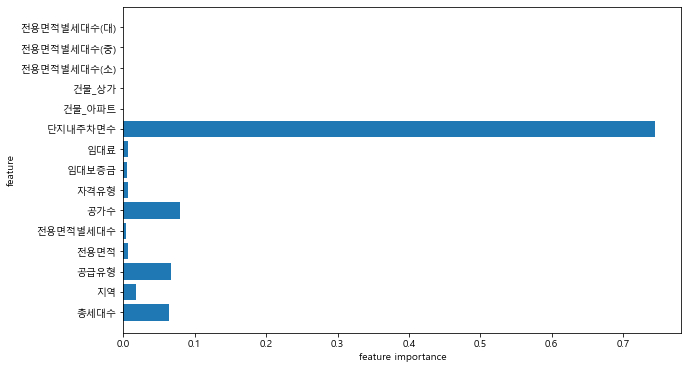

In [92]:
plot_feature_important_up(Gradient_B, n_features, feature_names)

In [32]:
pred1

array([651.69105263, 698.43894737, 649.32421053, ..., 226.68105263,
       234.37368421, 237.89894737])

In [33]:
pred1*0.2 + pred2*0.8

array([743.19105669, 778.10525208, 750.97187027, ..., 197.74592804,
       184.01515965, 202.4282741 ])

In [96]:
test['등록차량수'] = pred2

new_test = test.copy()
new_test['코드별차량수평균'] = test.groupby('단지코드')['등록차량수'].transform(np.mean)
new_test

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,지하철,버스정류장,단지내주차면수,건물_아파트,건물_상가,전용면적별세대수(소),전용면적별세대수(중),전용면적별세대수(대),등록차량수,코드별차량수평균
0,C1072,6.626718,1,1,5,3.708437,4.762174,14.0,7,16.943586,...,0.0,2.0,6.527958,1.0,0.0,0,1,0,759.465645,774.980238
1,C1072,6.626718,1,1,5,3.867235,3.433987,14.0,0,17.400362,...,0.0,2.0,6.527958,1.0,0.0,0,1,0,799.425226,774.980238
2,C1072,6.626718,1,1,5,3.869116,4.727388,14.0,7,17.400362,...,0.0,2.0,6.527958,1.0,0.0,0,1,0,767.268900,774.980238
3,C1072,6.626718,1,1,5,3.869116,4.795791,14.0,7,17.400362,...,0.0,2.0,6.527958,1.0,0.0,0,1,0,767.656288,774.980238
4,C1072,6.626718,1,1,5,3.960051,4.110874,14.0,7,17.588203,...,0.0,2.0,6.527958,1.0,0.0,0,1,0,771.183619,774.980238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,C1267,6.516193,1,2,9,3.631515,4.844187,38.0,11,16.677363,...,0.0,1.0,6.148468,1.0,0.0,0,1,0,353.465980,369.103831
1018,C2189,5.948035,1,12,5,3.407511,4.574711,45.0,7,15.742966,...,0.0,2.0,5.707110,1.0,0.0,0,1,0,132.212641,135.107660
1019,C2189,5.948035,1,12,5,3.407511,3.044522,45.0,7,15.742966,...,0.0,2.0,5.707110,1.0,0.0,0,1,0,129.024894,135.107660
1020,C2189,5.948035,1,12,5,3.700067,5.313206,45.0,7,16.411511,...,0.0,2.0,5.707110,1.0,0.0,0,0,1,143.976532,135.107660


In [97]:
new_test = new_test.drop_duplicates('단지코드', keep='first').reset_index()

sub_df = new_test[['단지코드', '코드별차량수평균']]
sub_df.columns = ['code', 'num']
sub_df

,code,num
0,C1072,774.980238
1,C1128,1189.854760
2,C1456,538.396034
3,C1840,466.651905
4,C1332,985.067733
...,...,...
145,C2456,216.732831
146,C1266,349.096240
147,C2152,-1.746694
148,C1267,369.103831


In [98]:
sub_df.to_csv('test2.csv', index=False)

os.listdir(os.getcwd())

['.ipynb_checkpoints',
 '07_17_first_submit.csv',
 '07_17_second_submit.csv',
 '07_17_third_submit.csv',
 '07_18_first_submit.csv',
 '07_18_second_submit.csv',
 '07_18_third_submit.csv',
 '07_19_first_submit.csv',
 '07_19_second_submit.csv',
 '07_19_third_submit.csv',
 '07_20_first_submit.csv',
 '07_20_second_submit.csv',
 '07_20_third_submit_pred1.csv',
 '07_20_third_submit_pred2.csv',
 'CSV',
 'parking_data_preprocessing_test_07_17.csv',
 'parking_data_preprocessing_test_07_18.csv',
 'parking_data_preprocessing_test_07_19.csv',
 'parking_data_preprocessing_test_07_20.csv',
 'parking_data_preprocessing_train_07_17.csv',
 'parking_data_preprocessing_train_07_18.csv',
 'parking_data_preprocessing_train_07_19.csv',
 'parking_data_preprocessing_train_07_20.csv',
 'Parking_demand_07_12(1).ipynb',
 'Parking_demand_07_12(2).ipynb',
 'Parking_demand_07_14.ipynb',
 'Parking_demand_07_16.ipynb',
 'Parking_demand_07_17.ipynb',
 'Parking_demand_07_18.ipynb',
 'Parking_demand_07_19.ipynb',
 'Parki

### 첫 번째 제출 : 120.9567

In [62]:
%%time
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

sel = ['총세대수', '임대건물구분', '지역', '공급유형', '전용면적', 
       '전용면적별세대수', '공가수', '자격유형', '임대보증금', '임대료', 
       '지하철', '버스정류장', '단지내주차면수']

X = train[sel]
y = train['등록차량수']
test_X = test[sel]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, random_state=345)

Random_F = RandomForestRegressor(n_estimators=1900, random_state=123)
Random_F.fit(X, y)
pred1 = Random_F.predict(test_X)


Gradient_B = GradientBoostingRegressor(learning_rate=0.11, 
                                      n_estimators=2300, max_depth=3, 
                                      random_state=123)

Gradient_B.fit(X, y)
pred2 = Gradient_B.predict(test_X)

Wall time: 21.9 s


In [73]:
test['등록차량수'] = pred2

new_test = test.copy()
new_test['코드별차량수평균'] = test.groupby('단지코드')['등록차량수'].transform(np.mean)
new_test

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,지하철,버스정류장,단지내주차면수,건물_아파트,건물_상가,전용면적별세대수(소),전용면적별세대수(중),전용면적별세대수(대),등록차량수,코드별차량수평균
0,C1072,754,1,1,5,39.79,116,14.0,7,2.283000e+07,...,0.0,2.0,683.0,1.0,0.0,0,1,0,759.122214,767.685638
1,C1072,754,1,1,5,46.81,30,14.0,0,3.604800e+07,...,0.0,2.0,683.0,1.0,0.0,0,1,0,798.010366,767.685638
2,C1072,754,1,1,5,46.90,112,14.0,7,3.604800e+07,...,0.0,2.0,683.0,1.0,0.0,0,1,0,769.686269,767.685638
3,C1072,754,1,1,5,46.90,120,14.0,7,3.604800e+07,...,0.0,2.0,683.0,1.0,0.0,0,1,0,761.087737,767.685638
4,C1072,754,1,1,5,51.46,60,14.0,7,4.349700e+07,...,0.0,2.0,683.0,1.0,0.0,0,1,0,766.820445,767.685638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,C1267,675,1,2,9,36.77,126,38.0,11,1.749390e+07,...,0.0,1.0,467.0,1.0,0.0,0,1,0,293.886736,313.738572
1018,C2189,382,1,12,5,29.19,96,45.0,7,6.872000e+06,...,0.0,2.0,300.0,1.0,0.0,0,1,0,178.755213,177.534822
1019,C2189,382,1,12,5,29.19,20,45.0,7,6.872000e+06,...,0.0,2.0,300.0,1.0,0.0,0,1,0,178.622091,177.534822
1020,C2189,382,1,12,5,39.45,202,45.0,7,1.341000e+07,...,0.0,2.0,300.0,1.0,0.0,0,0,1,169.627537,177.534822


In [74]:
new_test = new_test.drop_duplicates('단지코드', keep='first').reset_index()

sub_df = new_test[['단지코드', '코드별차량수평균']]
sub_df.columns = ['code', 'num']
sub_df

,code,num
0,C1072,767.685638
1,C1128,1162.683069
2,C1456,574.341389
3,C1840,526.834614
4,C1332,758.710561
...,...,...
145,C2456,193.659312
146,C1266,377.341458
147,C2152,0.715287
148,C1267,313.738572


In [71]:
sub_df

,code,num
0,C1072,654.628355
1,C1128,1093.639766
2,C1456,536.793977
3,C1840,510.830132
4,C1332,963.684934
...,...,...
145,C2456,245.756316
146,C1266,531.785895
147,C2152,39.903421
148,C1267,425.507895


In [50]:
pred1

array([651.19315789, 697.38421053, 645.95684211, ..., 226.96315789,
       236.98      , 237.99052632])

In [51]:
pred2

array([759.12221375, 798.01036565, 769.68626924, ..., 178.62209108,
       169.62753706, 183.13444469])

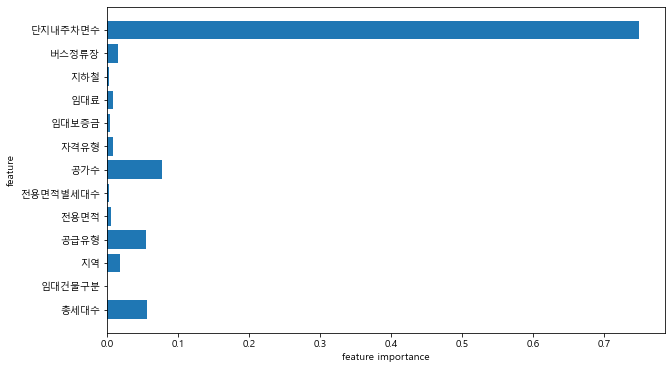

In [55]:
n_features = X.shape[1]
feature_names = sel
plot_feature_important_up(Random_F, n_features, feature_names)

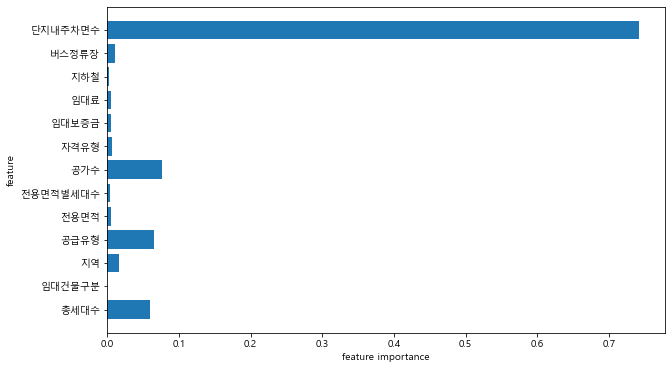

In [56]:
plot_feature_important_up(Gradient_B, n_features, feature_names)

In [75]:
sub_df.to_csv('07_20_fourth_submit.csv', index=False)

os.listdir(os.getcwd())

['.ipynb_checkpoints',
 '07_17_first_submit.csv',
 '07_17_second_submit.csv',
 '07_17_third_submit.csv',
 '07_18_first_submit.csv',
 '07_18_second_submit.csv',
 '07_18_third_submit.csv',
 '07_19_first_submit.csv',
 '07_19_second_submit.csv',
 '07_19_third_submit.csv',
 '07_20_first_submit.csv',
 '07_20_fourth_submit.csv',
 '07_20_second_submit.csv',
 '07_20_third_submit.csv',
 'CSV',
 'parking_data_preprocessing_test_07_17.csv',
 'parking_data_preprocessing_test_07_18.csv',
 'parking_data_preprocessing_test_07_19.csv',
 'parking_data_preprocessing_test_07_20.csv',
 'parking_data_preprocessing_train_07_17.csv',
 'parking_data_preprocessing_train_07_18.csv',
 'parking_data_preprocessing_train_07_19.csv',
 'parking_data_preprocessing_train_07_20.csv',
 'Parking_demand_07_12(1).ipynb',
 'Parking_demand_07_12(2).ipynb',
 'Parking_demand_07_14.ipynb',
 'Parking_demand_07_16.ipynb',
 'Parking_demand_07_17.ipynb',
 'Parking_demand_07_18.ipynb',
 'Parking_demand_07_19.ipynb',
 'Parking_demand_0

### 단순히 feature만 바꿨을 때(두 번째 시도) : 119.5681